# Predicting multiple planets

In this notebook we will show how manually load an MDN model and perform an interior characterization of several planets at once

In [1]:
from exomdn.mdn_model import Model
from exomdn.plotting import cornerplot
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

2023-07-12 15:28:31.662988: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = Model("../models/mass_radius_Teq/")

2023-07-12 15:28:34.271588: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loaded model 'mass_radius_Teq'
Model architecture:

Model: "MDN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 relu_0 (Dense)              (None, 384)               1536      
                                                                 
 relu_1 (Dense)              (None, 384)               147840    
                                                                 
 relu_2 (Dense)              (None, 384)               147840    
                                                                 
 output_mdn (MDN)            (None, 650)               250250    
                                                                 
Total params: 547,466
Trainable params: 547,466
Non-trainable params: 0
_________________________________________________________________


# Preparing planet data

In [3]:
# First check the order of MDN inputs
model.inputs

['planet_mass', 'planet_radius', 'T_eq']

In [4]:
planets = [[1.374, 1.116, 400], # TRAPPIST-1 b
           [1.308, 1.097, 342], # TRAPPIST-1 c
           [0.388, 0.788, 288], # TRAPPIST-1 d
           [0.692, 0.920, 251], # TRAPPIST-1 e
           [1.039, 1.045, 219], # TRAPPIST-1 f
           [1.321, 1.129, 199], # TRAPPIST-1 g
           [1, 1, 255]] # Earth 

In [5]:
prediction, mixture, input_prompt = model.predict(x=planets, samples=5000)
prediction["prediction"].replace({0: "TRAPPIST-1 b", 1: "TRAPPIST-1 c", 2: "TRAPPIST-1 d", 3: "TRAPPIST-1 e", 4: "TRAPPIST-1 f", 5: "TRAPPIST-1 g", 6: "Earth"}, inplace=True)

Running prediction (n=7)
1/1 [==============================] - 0s 152ms/step
Sampling from mixture (7x5000 samples)


# Visualization

Using seaborn FacetGrid to plot the core radius fraction for all planets in one figure 

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

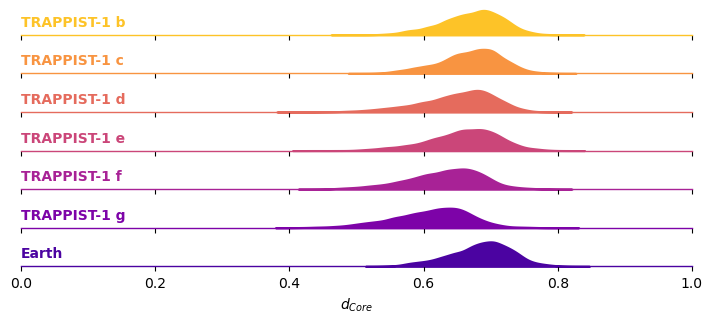

In [12]:
# Plot core radius fraction
# following https://seaborn.pydata.org/examples/kde_ridgeplot

g = sns.FacetGrid(prediction, row="prediction", hue="prediction", aspect=15, height=.5, palette="plasma_r")

# Draw densities for each planet
g.map(sns.kdeplot, "core_rf", fill=True, alpha=1, linewidth=1.5, clip_on=False)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=1, linestyle="-", color=None, clip_on=False)
g.set(xlim=(0,1))


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .5, label, fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

g.map(label, "core_rf")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.5)
g.set_titles("")
g.set(yticks=[], ylabel="", xlabel="$d_{Core}$")
g.despine(bottom=True, left=True)